# Lab Assignment: Building a Neural Network from Scratch

### Objective
This lab guides you through the implementation of a simple feedforward neural network from scratch. 
By completing this lab, you will:
- Initialize a neural network with weights and biases.
- Compute the weighted sum at each node.
- Apply activation functions for node outputs.
- Perform forward propagation to compute predictions.
- Implement backpropagation to compute gradients.
- Update weights using gradients to minimize the loss.

## Step 1: Initialize the Network

In [29]:
import numpy as np
np.random.seed(42) # For reproducibility

def initialize_network(input_size, hidden_layers, output_size):
    
    num_nodes_previous = input_size # number of nodes in the previous layer

    network = {}
    
    # loop through each layer and randomly initialize the weights and biases associated with each layer
    for layer in range(len(hidden_layers) + 1):
        
        if layer == len(hidden_layers):
            layer_name = 'output' # name last layer in the network output
            num_nodes = output_size
        else:
            layer_name = 'layer_{}'.format(layer + 1) # otherwise give the layer a number
            num_nodes = hidden_layers[layer] 
        
        # initialize weights and bias for each node
        network[layer_name] = {}
        for node in range(num_nodes):
            node_name = 'node_{}'.format(node+1)
            network[layer_name][node_name] = {
                'weights': np.around(np.random.uniform(size=num_nodes_previous), decimals=2),
                'biases': np.around(np.random.uniform(size=1), decimals=2),
            }
    
        num_nodes_previous = num_nodes

    return network # return the network
    

# Initialize a network with 3 inputs, 2 hidden layers (4 and 3 nodes), and 1 output node
network = initialize_network(3, [4, 3], 1) # 3 nodes for input, 7 nodes for hidden layer, 1 output node. 11 nodes, 8 biases
print("Ajeje + Initialized Network:", network['layer_1']['node_1']['weights'][1])

Ajeje + Initialized Network: 0.95


## Step 2: Compute Weighted Sum

In [6]:
def compute_weighted_sum(inputs, weights, biases):
    return np.sum(inputs * weights) + biases # 1-D arrays so just do np.sum of inputs * weights
    
# Test weighted sum
inputs = np.array([[0.5, 0.2, 0.1]])
layer = network['layer_1']['node_1']  # First layer
Z = compute_weighted_sum(inputs, layer['weights'], layer['biases'])
print("Ajeje + Weighted Sum:", Z)

Ajeje + Weighted Sum: [1.048]


## Step 3: Compute Node Activation

In [9]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))


def sigmoid_derivative(A):
    return A * (1 - A)


# Compute activation for the weighted sum
A = sigmoid(Z)
print("Ajeje + Activation:", A)

Ajeje + Activation: [0.74039066]


## Step 4: Perform Forward Propagation

In [12]:
def forward_propagation(inputs, network):
    """
    Perform forward propagation through the network.
    Arguments:
        inputs: Input array.
        network: Network dictionary with weights and biases.
    Returns:
        activations: List of activations for all layers.
    """
    activations = [inputs]  # Start with the input layer
    for layer in network.values():
    #for layer in network.values():   
        z = []
        a = []
        for node in layer.values():
        #for node in layer.values():
            z_value = np.dot(activations[-1], node['weights']) + node['biases']
            z.append(z_value)
            a.append(sigmoid(z_value))
        activations.append(np.array(a).flatten())
    return activations



# Perform forward propagation
activations = forward_propagation(inputs, network)
print(activations)
print("Ajeje + Final Output:", activations[-1])

[array([[0.5, 0.2, 0.1]]), array([0.74039066, 0.7286927 , 0.80439608, 0.65813632]), array([0.85167349, 0.84623151, 0.83715521]), array([0.87753786])]
Ajeje + Final Output: [0.87753786]


## Step 5: Backpropagation

In [15]:

def backpropagation(network, activations, y_true, learning_rate):
    """
    Perform backpropagation to compute gradients and update weights.
    
    Arguments:
        network: Dictionary containing layers with weights and biases.
        activations: List of activations from forward propagation.
        y_true: Ground truth labels (numpy array).
        learning_rate: Learning rate for weight updates.
    
    Returns:
        network: Updated network with modified weights and biases.
    """
    # Step 1: Compute delta for the output layer
    delta_output = (activations[-1] - y_true) * sigmoid_derivative(activations[-1])  # Shape (1,)

    # Initialize delta as the output layer delta
    delta = delta_output.reshape(-1, 1)  # Ensure it's a column vector

    # Step 2: Iterate through layers in reverse order (output -> hidden -> input)
    for layer_idx in reversed(range(len(network))):
        layer_name = list(network.keys())[layer_idx]
        current_layer = network[layer_name]

        if layer_name == 'output':
            # Use precomputed delta for the output layer
            pass
        else:
            # Get the next layer's weights
            next_layer_name = list(network.keys())[layer_idx + 1]
            next_layer = network[next_layer_name]

            # Extract weight matrix from the next layer (ensuring correct shape)
            weight_matrix = np.array([node['weights'] for node in next_layer.values()])  # Shape (next_layer_nodes, current_layer_nodes)

            # Compute delta for the current layer (ensure correct shape)
            delta = np.dot(weight_matrix.T, delta).flatten() * sigmoid_derivative(activations[layer_idx + 1])

        # Step 3: Update weights and biases for the current layer
        for node_idx, (node_name, node_data) in enumerate(current_layer.items()):
            a_prev = activations[layer_idx]  # Activations from the previous layer
            
            # Fix gradient shape for proper weight update
            dW = delta[node_idx] * a_prev.reshape(-1)  # Broadcasting fix
            db = delta[node_idx]  # Gradient for biases

            # Update weights and biases using gradient descent
            current_layer[node_name]['weights'] -= learning_rate * dW
            current_layer[node_name]['biases'] -= learning_rate * db

    return network

# Compute gradients
y_true = np.array([100])  # Example target output
learning_rate = 0.1
gradients = backpropagation(network, activations, y_true, learning_rate)
print("Ajeje + Gradients:", gradients)


Ajeje + Gradients: {'layer_1': {'node_1': {'weights': array([0.38900709, 0.95760284, 0.73380142]), 'biases': array([0.63801418])}, 'node_2': {'weights': array([0.19276636, 0.17310654, 0.06655327]), 'biases': array([0.93553271])}, 'node_3': {'weights': array([0.62824126, 0.7212965 , 0.02564825]), 'biases': array([1.02648252])}, 'node_4': {'weights': array([0.8513955, 0.2185582, 0.1842791]), 'biases': array([0.22279101])}}, 'layer_2': {'node_1': {'weights': array([0.40732411, 0.62562842, 0.54660209, 0.38540085]), 'biases': array([0.75495606])}, 'node_2': {'weights': array([0.2396933 , 0.38811818, 0.47831161, 0.54861779]), 'biases': array([0.92464959])}, 'node_3': {'weights': array([0.3980216 , 0.70489292, 0.8051402 , 0.22602222]), 'biases': array([0.87745556])}}, 'output': {'node_1': {'weights': array([1.07722066, 0.97142374, 1.84175547]), 'biases': array([2.0352212])}}}


## Step 6: Update Weights

In [18]:
# def update_weights(network, gradients, learning_rate):
    # Hints: weights -= learning_rate * 'dW'
    # Hints: biases -= learning_rate * 'db'
    # Provide your code
  

# Update weights with a learning rate of 0.1
# update_weights(network, gradients, learning_rate=0.1)
# print("Ajeje + Updated Network:", network)
# Update weights within backpropagation

## Step 7: Visualizing Loss Changes

In [21]:
# Use MSE to compute the loss 
def compute_loss(y_true, y_pred):
    """
    Compute the Mean Squared Error (MSE) loss.
    Arguments:
        y_true: Ground truth labels (numpy array).
        y_pred: Predicted output from the network (numpy array).
    Returns:
        Mean Squared Error (scalar value).
    """
    return np.mean((y_true - y_pred) ** 2)


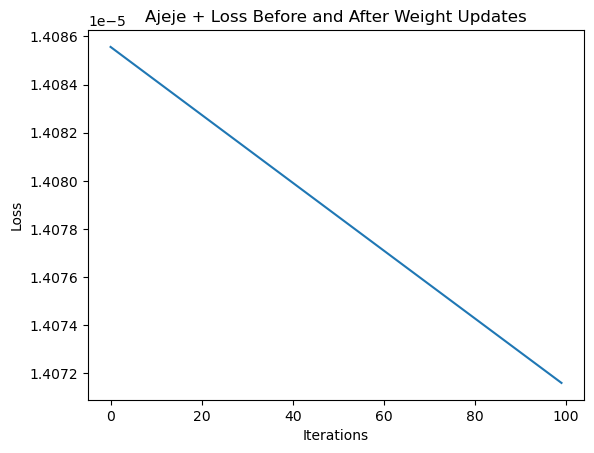

In [23]:
import matplotlib.pyplot as plt

# Training Loop
losses = []
inputs = np.array([[0.5, 0.2, 0.1]])
y_true = np.array([[1]])
learning_rate = 0.1

for iteration in range(100):
    # Step 1: Perform forward propagation to compute the network's predictions
    activations = forward_propagation(inputs, network)  # Forward pass
    
    # Step 2: Compute the loss (error) between the true labels and the predicted output
    loss = compute_loss(y_true, activations[-1])  # Loss for the current iteration
    losses.append(loss)  # Append the computed loss to the list
    
    # Step 3: Perform backpropagation to compute gradients and update weights
    network = backpropagation(network, activations, y_true, learning_rate)

    
    
# Plot Loss and rerun all cells
plt.plot(losses)
plt.title("Ajeje + Loss Before and After Weight Updates")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


### Step 8: Visualizing Gradients Changes (Graduate students)

Please pick a weight and plot the gradient change

You need to point which weight you pick and label it on your graph.